# **Data Cleaning to Retain Only Features Known Before Loan Approval/Denial**

## **1. Load and View Data**

In [4]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
!pip install missingno
import missingno as msno
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# List drive content
os.listdir('/content/drive/MyDrive')

['Innitial Data Cleaning.ipynb',
 'LC_loans_granting_model_dataset.csv',
 'Colab Notebooks',
 'processed_loan_data.csv',
 'processed_loan_data.parquet',
 'LCDataDictionary.xlsx',
 'NOTE2.ipynb',
 'loan_2019_2020.csv',
 'loan_2019_2020_filtered.csv',
 'loan_2019_2020_final.csv',
 'Portfolio - Bertie Dickinson.ipynb',
 'd1_cleaned.csv',
 'categorical_variable_plots.png',
 'categorical_default_non_default_rate_plots.png',
 'Default_Rate_Of_Categorical_variable.png',
 'numerical_density_plots_by_default.png',
 'Categorical_Default_non_Default_Count.png',
 'Numerical_density_plots_by_default.png',
 'FE_data.csv',
 'Feature_Engineering_data.csv',
 'processed_dataset.xls',
 'Categorical_Default_non_Default_Rate.png',
 'PHASE_2_data.csv',
 'project_data',
 'Phase_2_data_splits',
 'Phase_2_data_preprocessed',
 'Phase_2_data_preprocessed_csv',
 'Phase_2_models',
 'sd_30.csv',
 'First.ipynb']

In [6]:
df = pd.read_csv ('/content/drive/MyDrive/sd_30.csv', low_memory=False)

In [7]:
df

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,year,default
0,159085,59150223,12075.0,12075.0,12075.0,60 months,18.55%,310.25,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,2015.0,0
1,25159,144774548,4000.0,4000.0,4000.0,36 months,8.19%,125.70,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,2018.0,0
2,133890,60920711,25000.0,25000.0,25000.0,36 months,6.24%,763.28,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,2015.0,0
3,38033,129197725,16000.0,16000.0,16000.0,36 months,19.42%,589.90,D,D3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,2018.0,0
4,162779,15830734,10000.0,10000.0,10000.0,36 months,7.69%,311.94,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,2014.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318988,58455,116474030,30575.0,30575.0,30575.0,36 months,23.88%,1197.62,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,2017.0,0
318989,162393,1452700,18000.0,18000.0,17975.0,36 months,15.31%,626.72,C,C2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,2012.0,0
318990,157019,1516102,25000.0,25000.0,25000.0,36 months,13.11%,843.68,B,B4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,2012.0,0
318991,5644,124153097,16500.0,16500.0,16500.0,60 months,19.03%,428.30,D,D3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,2017.0,0


In [8]:
df.shape

(318993, 144)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318993 entries, 0 to 318992
Columns: 144 entries, Unnamed: 0 to default
dtypes: float64(107), int64(3), object(34)
memory usage: 350.5+ MB


In [10]:
# Show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318993 entries, 0 to 318992
Data columns (total 144 columns):
 #    Column                                      Non-Null Count   Dtype  
---   ------                                      --------------   -----  
 0    Unnamed: 0                                  318993 non-null  int64  
 1    id                                          318993 non-null  int64  
 2    loan_amnt                                   318993 non-null  float64
 3    funded_amnt                                 318993 non-null  float64
 4    funded_amnt_inv                             318993 non-null  float64
 5    term                                        318993 non-null  object 
 6    int_rate                                    318993 non-null  object 
 7    installment                                 318993 non-null  float64
 8    grade                                       318993 non-null  object 
 9    sub_grade                                   318993 non-nu

## **2. Drop Variables with High Missing Values**

### **i. Variable missing values count and percentage check**

In [11]:
# Check for missing values and their percentage
missing_data = df.isnull().sum().to_frame(name='Missing Values')
missing_data['% of Total'] = (missing_data['Missing Values'] / len(df)) * 100

# Optional: Filter to show only columns with missing data
#missing_data = missing_data[missing_data['Missing Values'] > 0]

# Sort by percentage descending
missing_data = missing_data.sort_values('% of Total', ascending=False)

# Display result
display(missing_data)

,Missing Values,% of Total
next_pymnt_d,318920,99.977115
hardship_loan_status,317299,99.468954
hardship_length,317297,99.468327
hardship_start_date,317297,99.468327
hardship_dpd,317297,99.468327
payment_plan_start_date,317297,99.468327
deferral_term,317297,99.468327
hardship_reason,317297,99.468327
hardship_type,317297,99.468327
hardship_end_date,317297,99.468327


**Observation**: Most of the variables for joint loan applicants have more than 90% missing values. I would do some analysis and decide whether or not to drop joint loan applications and work on individual applications only.

### **ii. Analyse  "application_type"**

In [12]:
df['application_type'].value_counts()

,count
application_type,
Individual,303135
Joint App,15858


In [13]:
# Create crosstab of application_type vs default status
default_counts = pd.crosstab(df['application_type'], df['default'])

# Optional: Rename columns for clarity (assuming 0 = Non-Default, 1 = Default)
default_counts.columns = ['Non-Default', 'Default']

# Add Total column
default_counts['Total'] = default_counts['Non-Default'] + default_counts['Default']

# Add Default Rate column (%)
default_counts['Default Rate (%)'] = (default_counts['Default'] / default_counts['Total']) * 100
default_counts['Default Rate (%)'] = default_counts['Default Rate (%)'].round(2)

# Reorder columns: Total first
default_counts = default_counts[['Total', 'Non-Default', 'Default', 'Default Rate (%)']]

# Show the result
display(default_counts)


,Total,Non-Default,Default,Default Rate (%)
application_type,,,,
Individual,303135,244812,58323,19.24
Joint App,15858,11814,4044,25.50


### **iii. Examine columns with >50% missing values**

In [14]:
missing_ratio = df.isnull().mean()
cols_over_50_missing = missing_ratio[missing_ratio > 0.5]

# Display the columns and their missing percentages
print("Columns with >50% missing values:")
print((cols_over_50_missing * 100).round(2).sort_values(ascending=False))

Columns with >50% missing values:
next_pymnt_d                                  99.98
hardship_loan_status                          99.47
hardship_dpd                                  99.47
deferral_term                                 99.47
hardship_status                               99.47
hardship_start_date                           99.47
hardship_length                               99.47
hardship_reason                               99.47
hardship_type                                 99.47
payment_plan_start_date                       99.47
hardship_end_date                             99.47
orig_projected_additional_accrued_interest    98.86
hardship_amount                               98.76
hardship_payoff_balance_amount                98.76
hardship_last_payment_amount                  98.76
verification_status_joint                     95.24
sec_app_revol_util                            95.16
sec_app_mort_acc                              95.07
sec_app_fico_range_high       

**Description of Variables**

In [17]:
# Load Dictionary for Lending Club Data
dict_df = pd.read_excel('/content/drive/MyDrive/LCDataDictionary.xlsx')

# Show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

display(dict_df)

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
5,annual_inc_joint,The combined self-reported annual income provi...
6,application_type,Indicates whether the loan is an individual ap...
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/...


### **iv. Drop columns with >50% missing values**

In [18]:
d1 = df.drop(columns=cols_over_50_missing.index)

In [20]:
d1.shape

(318993, 95)

In [19]:
d1.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318993 entries, 0 to 318992
Data columns (total 95 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  318993 non-null  int64  
 1   id                          318993 non-null  int64  
 2   loan_amnt                   318993 non-null  float64
 3   funded_amnt                 318993 non-null  float64
 4   funded_amnt_inv             318993 non-null  float64
 5   term                        318993 non-null  object 
 6   int_rate                    318993 non-null  object 
 7   installment                 318993 non-null  float64
 8   grade                       318993 non-null  object 
 9   sub_grade                   318993 non-null  object 
 10  emp_title                   294757 non-null  object 
 11  emp_length                  298905 non-null  object 
 12  home_ownership              318993 non-null  object 
 13  annual_inc    

## **3. Drop Loan Post-Approval and Irrelevant Variables**

In [24]:
# Define a list of post-approval variables to drop
post_approval_vars = [
    # Payment and Performance Variables
    'funded_amnt', 'funded_amnt_inv', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
    'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
    'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
    'last_pymnt_amnt', 'last_credit_pull_d', 'last_fico_range_high',
    'last_fico_range_low',

    # Post-Approval Flags
    'hardship_flag', 'debt_settlement_flag', 'pymnt_plan',

    # Irrelevant Variables
    'Unnamed: 0', 'id', 'zip_code', 'policy_code', 'initial_list_status', 'url',  # URL is not relevant for prediction

    # Other post-approval tracking variables
    'acc_now_delinq', 'delinq_amnt', 'tot_coll_amt', 'tot_cur_bal', 'bc_util', 'bc_open_to_buy',
    'avg_cur_bal', 'all_util', 'inq_fi', 'inq_last_12m', 'num_accts_ever_120_pd', 'collections_12_mths_ex_med',
    'mths_since_recent_inq', 'chargeoff_within_12_mths', 'num_tl_120dpd_2m', 'num_tl_30dpd',
    'num_tl_90g_dpd_24m', 'num_rev_tl_bal_gt_0', 'num_bc_sats', 'num_tl_op_past_12m', 'tax_liens',
    'year', 'loan_status', 'issue_d'
]

# Drop the post-approval variables from the DataFrame
d2 = d1.drop(columns=post_approval_vars, errors='ignore')

# Print the shape before and after dropping columns
print(f"Original DataFrame shape: {d1.shape}")
print(f"Pre-approval DataFrame shape: {d2.shape}")

# Display the remaining columns
print("\nRemaining columns:")
print(d2.columns.tolist())

Original DataFrame shape: (318993, 95)
Pre-approval DataFrame shape: (318993, 49)

Remaining columns:
['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'application_type', 'total_rev_hi_lim', 'acc_open_past_24mths', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_sats', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'default']


In [25]:
d2.dtypes

,0
loan_amnt,float64
term,object
int_rate,object
installment,float64
grade,object
sub_grade,object
emp_title,object
emp_length,object
home_ownership,object
annual_inc,float64


## **4. Check Correlation and Drop Highly Correlated Variables to avoid Multicollinearity**

### **i. Correlation Matrix - Pearson Correlation**

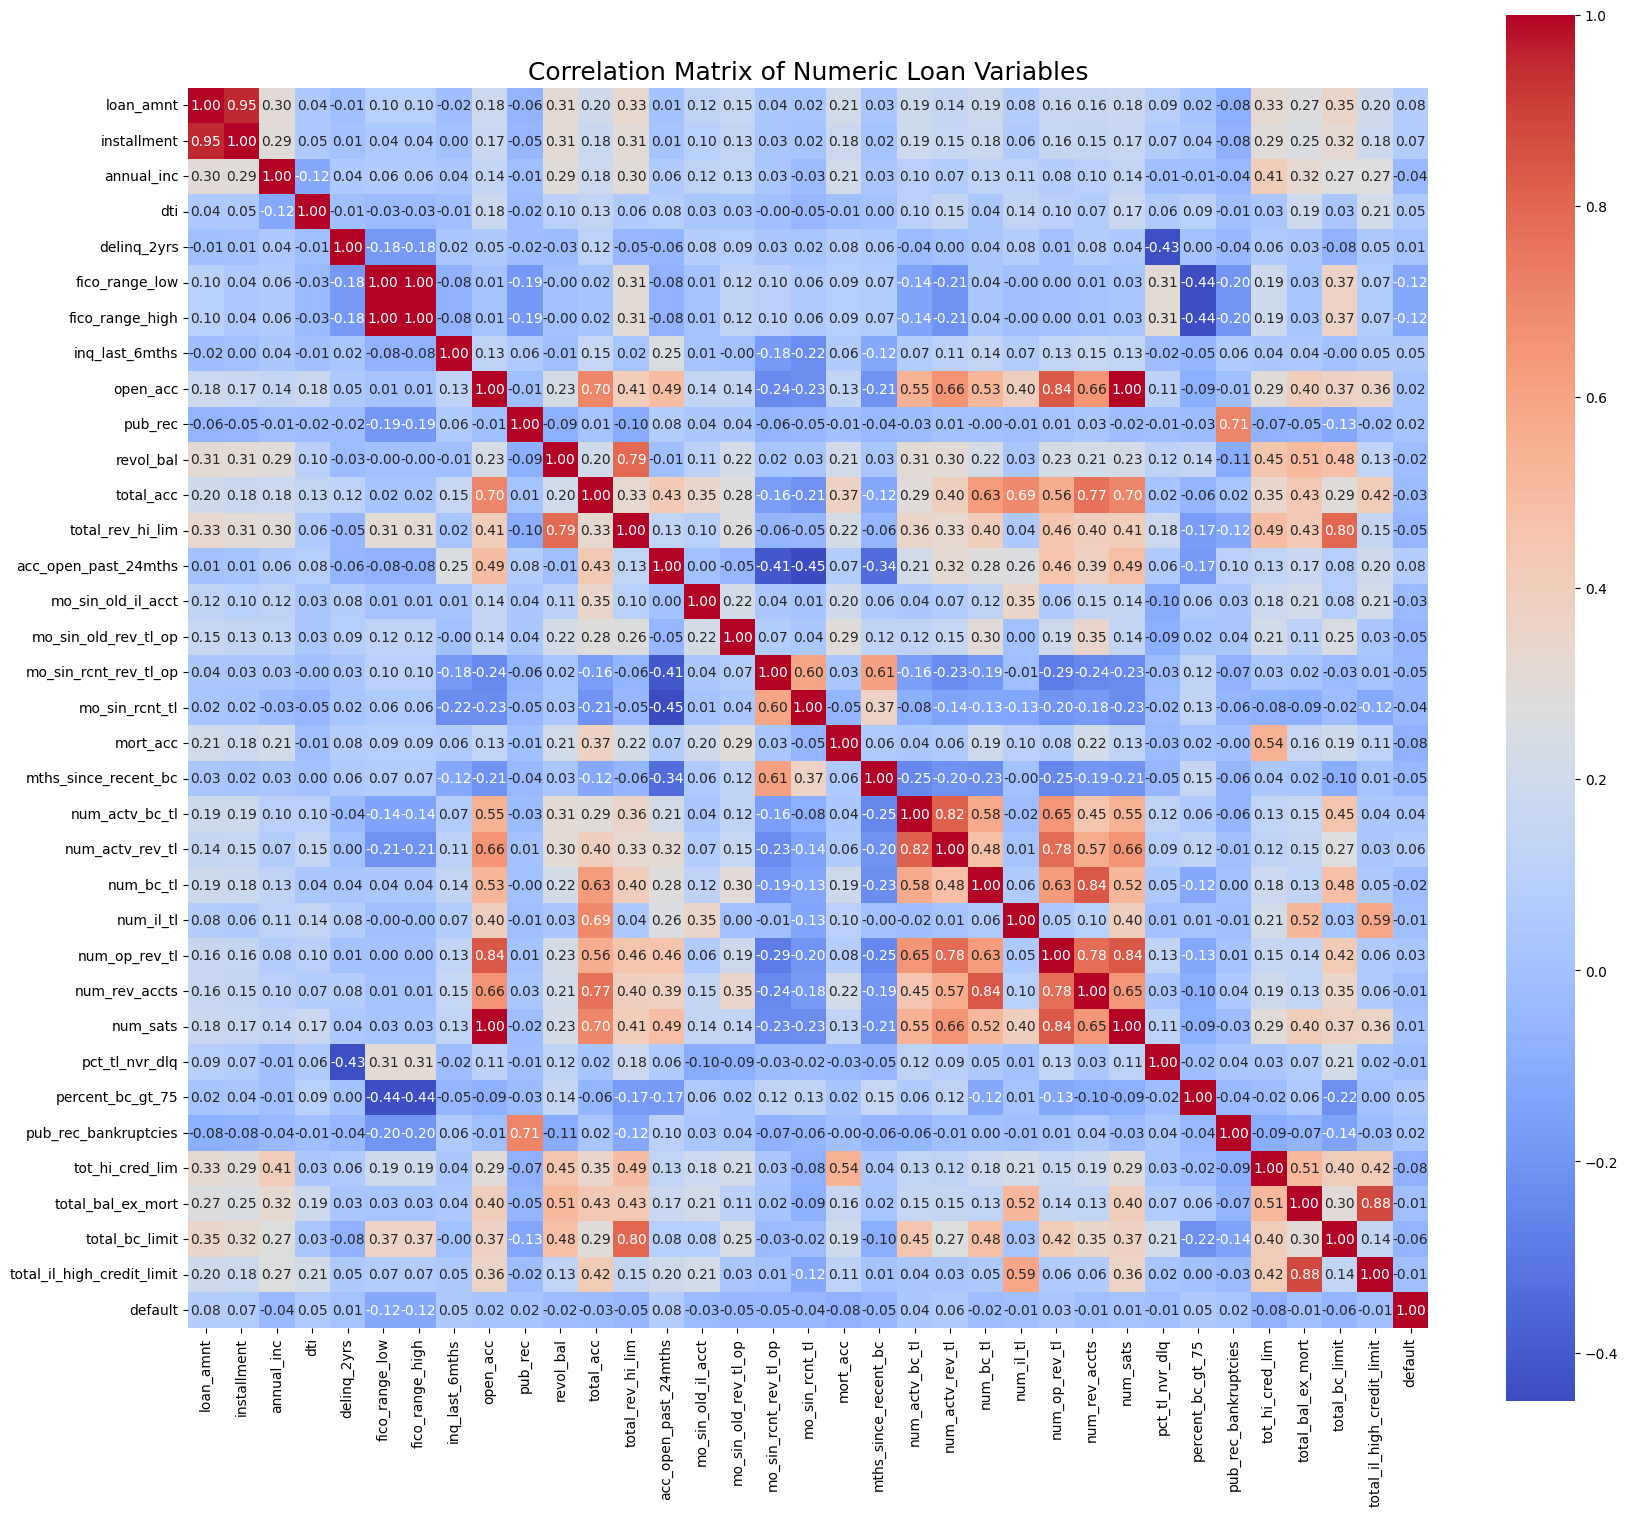

In [26]:
# Select only numeric columns
numeric_d2 = d2.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_d2.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 18))

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)

# Add a title
plt.title("Correlation Matrix of Numeric Loan Variables", fontsize=18)

# Show plot
plt.show()

A significant number of variables are highly correlated.

**Variance Inflation Factor** will be used to check Multicollinearity after missing values have been imputed after train test split. For now, I'll use Pearson's correlation values to drop highly correlated variables that are at risk of multicollinearity.

In [27]:
# Highly correlated pairs

# Compute the absolute correlation matrix
corr_matrix_abs = corr_matrix.abs()

# Set threshold
threshold = 0.7

# Find pairs above the threshold (excluding self-correlation)
high_corr_pairs = []

for i in corr_matrix_abs.columns:
    for j in corr_matrix_abs.columns:
        if i != j and corr_matrix_abs.loc[i, j] > threshold:
            high_corr_pairs.append((i, j, corr_matrix.loc[i, j]))

# Convert to DataFrame for easier sorting and display
high_corr_d2 = pd.DataFrame(high_corr_pairs, columns=['Feature_1', 'Feature_2', 'Correlation'])

# Drop duplicate pairs (i,j) vs (j,i)
high_corr_d2 = high_corr_d2.sort_values(by='Correlation', ascending=False)
high_corr_d2 = high_corr_d2.drop_duplicates(subset=['Correlation', 'Feature_1'])

# Display the result
display(high_corr_d2)


,Feature_1,Feature_2,Correlation
3,fico_range_high,fico_range_low,1.000000
2,fico_range_low,fico_range_high,1.000000
6,open_acc,num_sats,0.999039
25,num_sats,open_acc,0.999039
0,loan_amnt,installment,0.949780
1,installment,loan_amnt,0.949780
29,total_bal_ex_mort,total_il_high_credit_limit,0.877476
31,total_il_high_credit_limit,total_bal_ex_mort,0.877476
17,num_bc_tl,num_rev_accts,0.841011
23,num_rev_accts,num_bc_tl,0.841011


Will have a look at the percentage of missing values and then drop the highly correlated variables that have the highest number of missing values.

In [28]:
# Check for missing values and their percentage
missing_data = d2.isnull().sum().to_frame(name='Missing Values')
missing_data['% of Total'] = (missing_data['Missing Values'] / len(d2)) * 100

# Optional: Filter to show only columns with missing data
#missing_data = missing_data[missing_data['Missing Values'] > 0]

# Sort by percentage descending
missing_data = missing_data.sort_values('% of Total', ascending=False)

# Display result
display(missing_data)

,Missing Values,% of Total
mo_sin_old_il_acct,29528,9.256629
emp_title,24236,7.597659
pct_tl_nvr_dlq,20172,6.323650
mo_sin_rcnt_rev_tl_op,20126,6.309229
num_actv_bc_tl,20126,6.309229
num_rev_accts,20126,6.309229
num_op_rev_tl,20126,6.309229
total_il_high_credit_limit,20126,6.309229
num_actv_rev_tl,20126,6.309229
mo_sin_old_rev_tl_op,20126,6.309229


<Axes: >

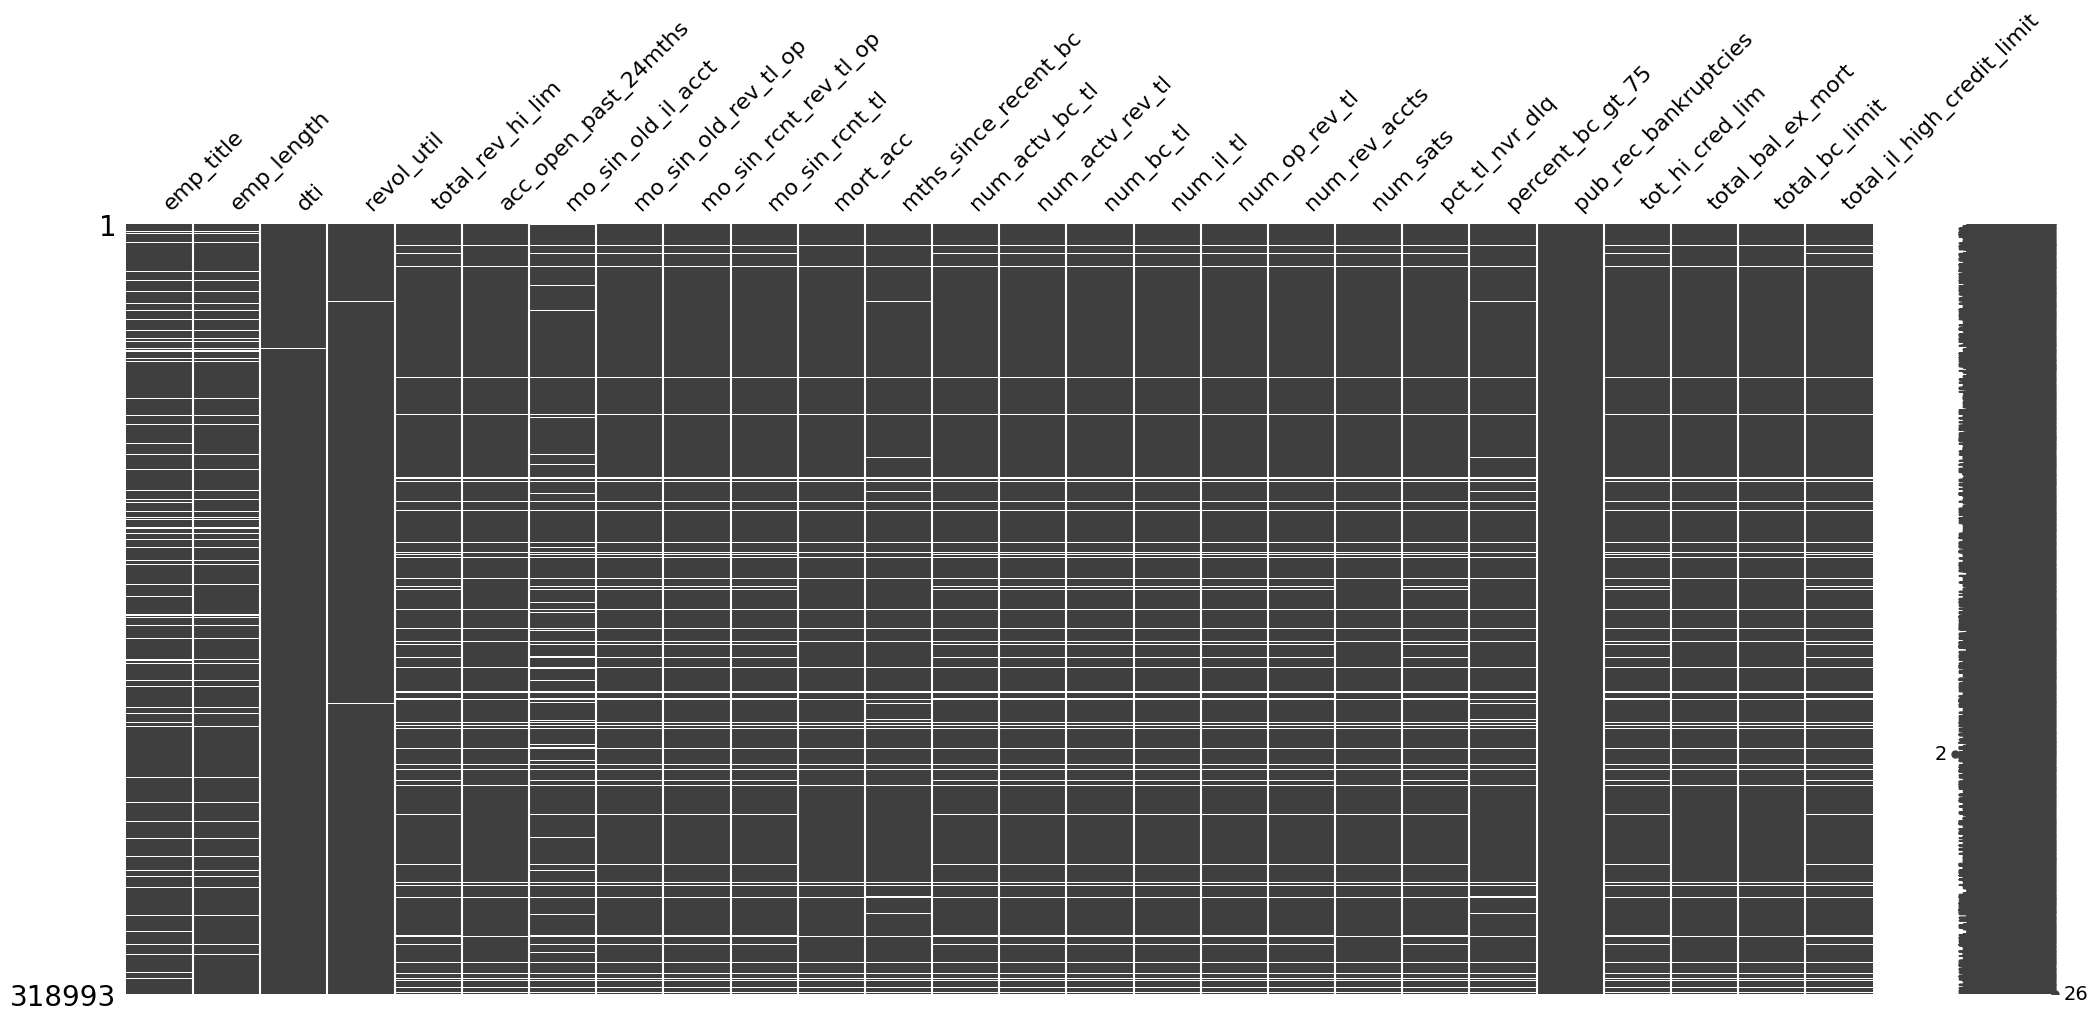

In [33]:
# Filter columns with more than 100 missing values
cols_with_missing = d2.columns[d2.isnull().sum() > 200]
d2_missing = d2[cols_with_missing]

# Visualize missingness for these columns only
msno.matrix(d2_missing)

There seems to be a missing pattern between the variables that have the same number of missing values.

### **ii. Drop highly correlated variables**

In [29]:
# List of highly correlated columns to drop
columns_to_drop = [
    'num_sats',
    'fico_range_high'
]

# Drop the columns from the DataFrame
d3 = d2.drop(columns=columns_to_drop)

# Form a new variable called fico_score from the average of the sum of the low and high fico range values.
#d3['fico_score'] = ((d3['fico_range_low'] + d3['fico_range_high']) / 2).round().astype(int)
#d3 = d3.drop(columns=['fico_range_low', 'fico_range_high'])

In [36]:
# Define the filename for the saved data
output_filename = '/content/drive/MyDrive/P1_data.csv'

# Save the DataFrame to a CSV file
d3.to_csv(output_filename, index=False)

print(f"DataFrame saved to '{output_filename}'")

DataFrame saved to '/content/drive/MyDrive/P1_data.csv'


**Next Notebook File - Data Cleaning and Exploratory Data Analysis (EDA)**